In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/Tomato_leafs/plant disease"

In [ ]:
train_dir='/content/drive/MyDrive/Tomato_leafs/plant disease/train'

In [ ]:
print('Number of images in each class before data_Augmentation :')
import os

# get list of subdirectories in train folder
subdirs = next(os.walk(train_dir))[1]

# count number of subdirectories (which correspond to classes)
num_classes = len(subdirs)

print("Number of classes in train folder: ", num_classes)
for subdir in subdirs:
    subdir_path = os.path.join(train_dir, subdir)
    num_imgs = len(os.listdir(subdir_path))
    print(f"{subdir}: {num_imgs} images")

Number of images in each class before data_Augmentation :
Number of classes in train folder:  10
Tomato___Target_Spot: 1827 images
Tomato___Leaf_Mold: 1882 images
Tomato___Septoria_leaf_spot: 1745 images
Tomato___Tomato_mosaic_virus: 1779 images
Tomato___Late_blight: 1851 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961 images
Tomato___Spider_mites Two-spotted_spider_mite: 1751 images
Tomato___healthy: 1926 images
Tomato___Early_blight: 1930 images
Tomato___Bacterial_spot: 1702 images


In [ ]:
test_dir='/content/drive/MyDrive/Tomato_leafs/plant disease/valid'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
traindata=train.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 1555 images belonging to 5 classes.


In [ ]:
testdata=test.flow_from_directory(test_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 473 images belonging to 5 classes.


In [ ]:
print('Number of images in each class after data_Augmentation :')
for i, class_name in enumerate(traindata.class_indices.keys()):
    print(f'{class_name}: {len(traindata.classes[traindata.classes == i])}')

Number of images in each class after data_Augmentation :
Tomato___Bacterial_spot: 1702
Tomato___Early_blight: 1930
Tomato___Late_blight: 1851
Tomato___Leaf_Mold: 1882
Tomato___Septoria_leaf_spot: 1745
Tomato___Spider_mites Two-spotted_spider_mite: 1751
Tomato___Target_Spot: 1827
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961
Tomato___Tomato_mosaic_virus: 1779
Tomato___healthy: 1926


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax,Activation

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
seq_model = Sequential([ 
    Flatten(input_shape=(128,128,3), name='input_layer'),
  Dense(1024, activation='relu', name='layer1'),
    #Dense(512, activation='relu', name='layer2'),
    Dense(256, activation='relu', name='layer3'),
    #Dense(128, activation='relu', name='layer4'),
    Dense(5, activation='softmax', name='output_layer')
])

In [ ]:
seq_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
har=seq_model.fit(traindata,validation_data=testdata,epochs=5,batch_size=2)

Epoch 1/5
49/49 [==============================] - 450s 9s/step - loss: 18.2919 - accuracy: 0.2868 - val_loss: 3.5747 - val_accuracy: 0.3467
Epoch 2/5
49/49 [==============================] - 12s 247ms/step - loss: 3.1164 - accuracy: 0.4360 - val_loss: 1.8895 - val_accuracy: 0.4249
Epoch 3/5
49/49 [==============================] - 12s 247ms/step - loss: 1.8301 - accuracy: 0.4945 - val_loss: 1.7634 - val_accuracy: 0.6025
Epoch 4/5
49/49 [==============================] - 12s 245ms/step - loss: 1.4908 - accuracy: 0.5293 - val_loss: 1.2304 - val_accuracy: 0.5835
Epoch 5/5
49/49 [==============================] - 12s 255ms/step - loss: 1.1701 - accuracy: 0.5987 - val_loss: 1.1753 - val_accuracy: 0.5603


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(har.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,18.291937,0.286817,3.574650,0.346723
1,3.116369,0.436013,1.889520,0.424947
2,1.830072,0.494534,1.763448,0.602537
3,1.490816,0.529260,1.230448,0.583510
4,1.170125,0.598714,1.175257,0.560254


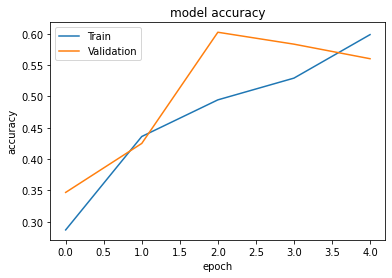

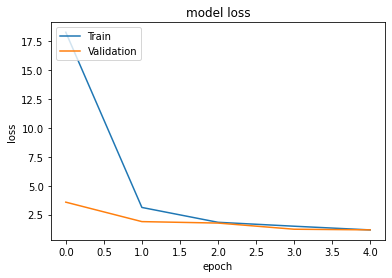

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(har.history['accuracy'])
plt.plot(har.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(har.history['loss'])
plt.plot(har.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

TypeError: ignored

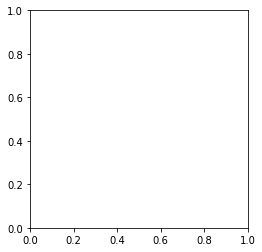

In [ ]:
import cv2

t=cv2.imread('/content/drive/MyDrive/Tomato_leafs/plant disease/valid/Tomato___Early_blight/e2e0a1a0-4f52-4320-ac24-69fa7f0fd033___RS_Erly.B 9596_180deg.JPG')
plt.imshow(t)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
testimg=cv2.resize(t,(128,128))
testimg=img_to_array(testimg)/255
h=np.expand_dims(testimg,axis=0)
r=model.predict(h)
classnames=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold"]
ypred=classnames[np.argmax(r)]
ypred

error: ignored